# Reglas de asociación
En este caso aprenderemos a manejar una tabla de datos de tipo transaccional y ver métodos para poder analizarla. También aplicaremos los conceptos de reglas de asociación en este ejemplo.

El caso estará estructurado así:

1. Explorar la estructura de una base de datos transaccional

2. Transformación de los datos para su análisis

3. Exploración descriptiva de los datos

4. Análisis de reglas de asociación

In [1]:
# librerias
library(arules)
library(arulesViz)
library(repr)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid



In [2]:
# definir ruta del directorio de trabajo
# setwd('C:/Users/Juliana/Desktop/Diplomado/D_2020/Casos/Casos/AssociationRules')
setwd('/root/Documentos/UN/UN_2020_2/DCD/module_4/class_3/jupyter/data')

La tabla de datos corresponde a compras de un supermercado. Cada fila representa artículos (ítems) que fueron comprados juntos el mismo día durante la misma compra. Tenemos un total de 9835 compras diferentes de hasta 32 productos

In [3]:
compras <-read.csv('compras_mercado.csv', stringsAsFactors = F)
# Eliminar filas vacías
compras <- na.omit(compras)
head(compras)

,Product.1,Product.2,Product.3,Product.4,Product.5,Product.6,Product.7,Product.8,Product.9,Product.10,⋯,Product.23,Product.24,Product.25,Product.26,Product.27,Product.28,Product.29,Product.30,Product.31,Product.32
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,⋯,,,,,,,,,,
2,tropical fruit,yogurt,coffee,,,,,,,,⋯,,,,,,,,,,
3,whole milk,,,,,,,,,,⋯,,,,,,,,,,
4,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,⋯,,,,,,,,,,
5,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,⋯,,,,,,,,,,
6,whole milk,butter,yogurt,rice,abrasive cleaner,,,,,,⋯,,,,,,,,,,


In [4]:
# estructura de datos filas y columnas
print(nrow(compras))
print(ncol(compras))

[1] 9835
[1] 32


A primera vista, se puede observar que las compras no contienen muchos productos, razón por la cuál hay muchas celdas vacías. Veamos para la primer columna qué tantos productos diferentes podríamos encontrar

In [5]:
print(paste('Encontramos en sólo esta primer columna',length(unique(compras[,'Product.1'])),'productos dirferentes'))
unique(compras[,'Product.1'])

[1] "Encontramos en sólo esta primer columna 158 productos dirferentes"


[1] "citrus fruit"              "tropical fruit"           
  [3] "whole milk"                "pip fruit"                
  [5] "other vegetables"          "rolls/buns"               
  [7] "potted plants"             "beef"                     
  [9] "frankfurter"               "chicken"                  
 [11] "butter"                    "fruit/vegetable juice"    
 [13] "packaged fruit/vegetables" "chocolate"                
 [15] "specialty bar"             "butter milk"              
 [17] "bottled water"             "yogurt"                   
 [19] "sausage"                   "brown bread"              
 [21] "hamburger meat"            "root vegetables"          
 [23] "pork"                      "pastry"                   
 [25] "canned beer"               "berries"                  
 [27] "coffee"                    "misc. beverages"          
 [29] "ham"                       "turkey"                   
 [31] "curd cheese"               "red/blush wine"           
 [33] "frozen potato products"    "flour"                    
 [35] "sugar"                     "frozen meals"             
 [37] "herbs"                     "soda"                     
 [39] "detergent"                 "grapes"                   
 [41] "processed cheese"          "fish"                     
 [43] "sparkling wine"            "newspapers"               
 [45] "curd"                      "pasta"                    
 [47] "popcorn"                   "finished products"        
 [49] "beverages"                 "bottled beer"             
 [51] "dessert"                   "dog food"                 
 [53] "specialty chocolate"       "condensed milk"           
 [55] "cleaner"                   "white wine"               
 [57] "meat"                      "ice cream"                
 [59] "hard cheese"               "cream cheese"             
 [61] "liquor"                    "pickled vegetables"       
 [63] "liquor (appetizer)"        "UHT-milk"                 
 [65] "candy"                     "onions"                   
 [67] "hair spray"                "photo/film"               
 [69] "domestic eggs"             "margarine"                
 [71] "shopping bags"             "salt"                     
 [73] "oil"                       "whipped/sour cream"       
 [75] "frozen vegetables"         "sliced cheese"            
 [77] "dish cleaner"              "baking powder"            
 [79] "specialty cheese"          "salty snack"              
 [81] "Instant food products"     "pet care"                 
 [83] "white bread"               "female sanitary products" 
 [85] "cling film/bags"           "soap"                     
 [87] "frozen chicken"            "house keeping products"   
 [89] "spread cheese"             "decalcifier"              
 [91] "frozen dessert"            "vinegar"                  
 [93] "nuts/prunes"               "potato products"          
 [95] "frozen fish"               "hygiene articles"         
 [97] "artif. sweetener"          "light bulbs"              
 [99] "canned vegetables"         "chewing gum"              
[101] "canned fish"               "cookware"                 
[103] "semi-finished bread"       "cat food"                 
[105] "bathroom cleaner"          "prosecco"                 
[107] "liver loaf"                "zwieback"                 
[109] "canned fruit"              "frozen fruits"            
[111] "brandy"                    "baby cosmetics"           
[113] "spices"                    "napkins"                  
[115] "waffles"                   "sauces"                   
[117] "rum"                       "chocolate marshmallow"    
[119] "long life bakery product"  "bags"                     
[121] "sweet spreads"             "soups"                    
[123] "mustard"                   "specialty fat"            
[125] "instant coffee"            "snack products"           
[127] "organic sausage"           "soft cheese"              
[129] "mayonnaise"                

Para analizar estos datos en R vamos a utilizar la librería **arules**  y su función apriori para generar las reglas de asociación. Para esto debemos transformar los datos, ya que la función que utilizaremos sólo recibe datos de tipo transacción. El resultado debe llevar a una fila por cada transacción y una columna que grupe todos los ítem separados por comas. 

In [6]:
trans <- function(){
  lista = list()
  for (i in 1:nrow(compras)) {
    lista[i][1]=as.character(compras[i,1])
    j <- 2
    while(j <= ncol(compras) & compras[i,j] != ""){
        lista[[i]][j]=as.character(compras[i,j])
        if (j < ncol(compras))
          j = j + 1
        else
          break
    } # end while
  } # end i loop
  return(lista)
} # end function

In [7]:
resultado <- trans()
resultado2 <- sapply(resultado, paste, collapse = ",")
resultado2[1:20]

[1] "citrus fruit,semi-finished bread,margarine,ready soups"                              
 [2] "tropical fruit,yogurt,coffee"                                                        
 [3] "whole milk"                                                                          
 [4] "pip fruit,yogurt,cream cheese,meat spreads"                                          
 [5] "other vegetables,whole milk,condensed milk,long life bakery product"                 
 [6] "whole milk,butter,yogurt,rice,abrasive cleaner"                                      
 [7] "rolls/buns"                                                                          
 [8] "other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)"                
 [9] "potted plants"                                                                       
[10] "whole milk,cereals"                                                                  
[11] "tropical fruit,other vegetables,white bread,bottled water,chocolate"                 
[12] "citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes"
[13] "beef"                                                                                
[14] "frankfurter,rolls/buns,soda"                                                         
[15] "chicken,tropical fruit"                                                              
[16] "butter,sugar,fruit/vegetable juice,newspapers"                                       
[17] "fruit/vegetable juice"                                                               
[18] "packaged fruit/vegetables"                                                           
[19] "chocolate"                                                                           
[20] "specialty bar"

Tranformamos este resultado como un objeto de tipo transacción para poder analizarlo

In [8]:
#transacciones
trObj <- as(strsplit(resultado2, ","), "transactions")

## Exploración de las compras

In [9]:
summary(trObj)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

Analicemos más en detalle cuál es el comportamiento del número de ítems por compra

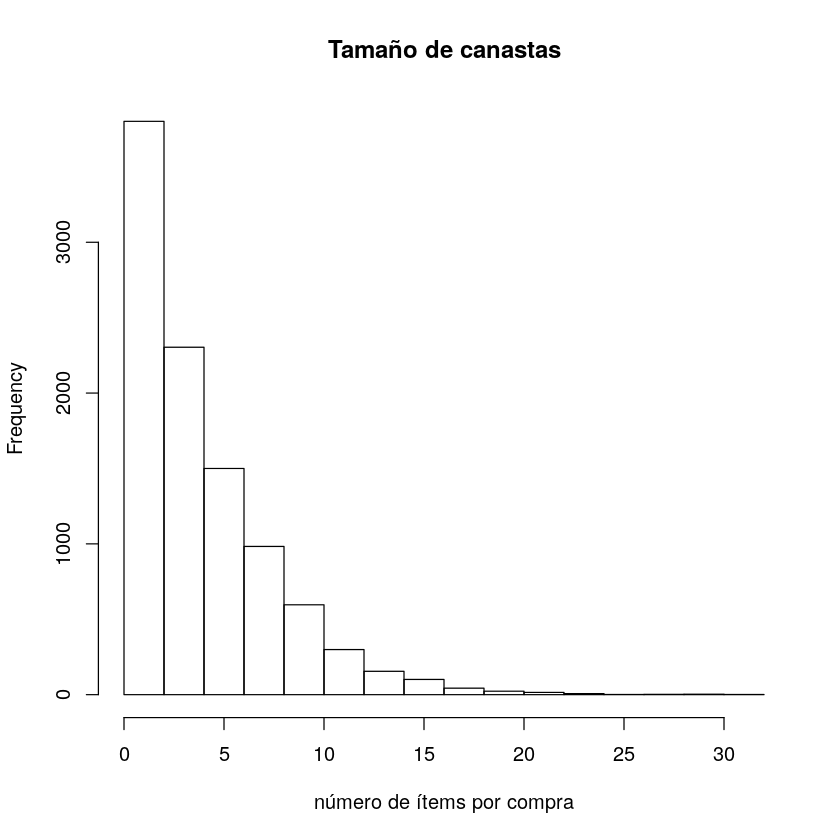

In [10]:
hist(size(trObj),xlab='número de ítems por compra',main='Tamaño de canastas')

Analicemos cuántas de las compras contienen sólo 1 ítem y cuántas menos de 10 ítems

In [11]:
# compras con solo 1 ítem
trObj[size(trObj)==1]
2159*100/9835

# reglas con menos de 10 ítems
trObj[size(trObj)<10]
8939*100/9835

transactions in sparse format with
 2159 transactions (rows) and
 169 items (columns)

[1] 21.95221

transactions in sparse format with
 8939 transactions (rows) and
 169 items (columns)

[1] 90.88968

Con la función apriori podemos obtener las reglas de asociación definiendo distintos valores para los umbrales de las métricas de evaluación

In [12]:
association.rules <- apriori(trObj, parameter = list(supp=0.001,conf=0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [5668 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


     lhs                    rhs                support     confidence
[1]  {honey}             => {whole milk}       0.001118454 0.7333333 
[2]  {tidbits}           => {rolls/buns}       0.001220132 0.5217391 
[3]  {cocoa drinks}      => {whole milk}       0.001321810 0.5909091 
[4]  {pudding powder}    => {whole milk}       0.001321810 0.5652174 
[5]  {cooking chocolate} => {whole milk}       0.001321810 0.5200000 
[6]  {cereals}           => {whole milk}       0.003660397 0.6428571 
[7]  {jam}               => {whole milk}       0.002948653 0.5471698 
[8]  {specialty cheese}  => {other vegetables} 0.004270463 0.5000000 
[9]  {rice}              => {other vegetables} 0.003965430 0.5200000 
[10] {rice}              => {whole milk}       0.004677173 0.6133333 
     coverage    lift     count
[1]  0.001525165 2.870009 11   
[2]  0.002338587 2.836542 12   
[3]  0.002236909 2.312611 13   
[4]  0.002338587 2.212062 13   
[5]  0.002541942 2.035097 13   
[6]  0.005693950 2.515917 36   
[7]  0

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



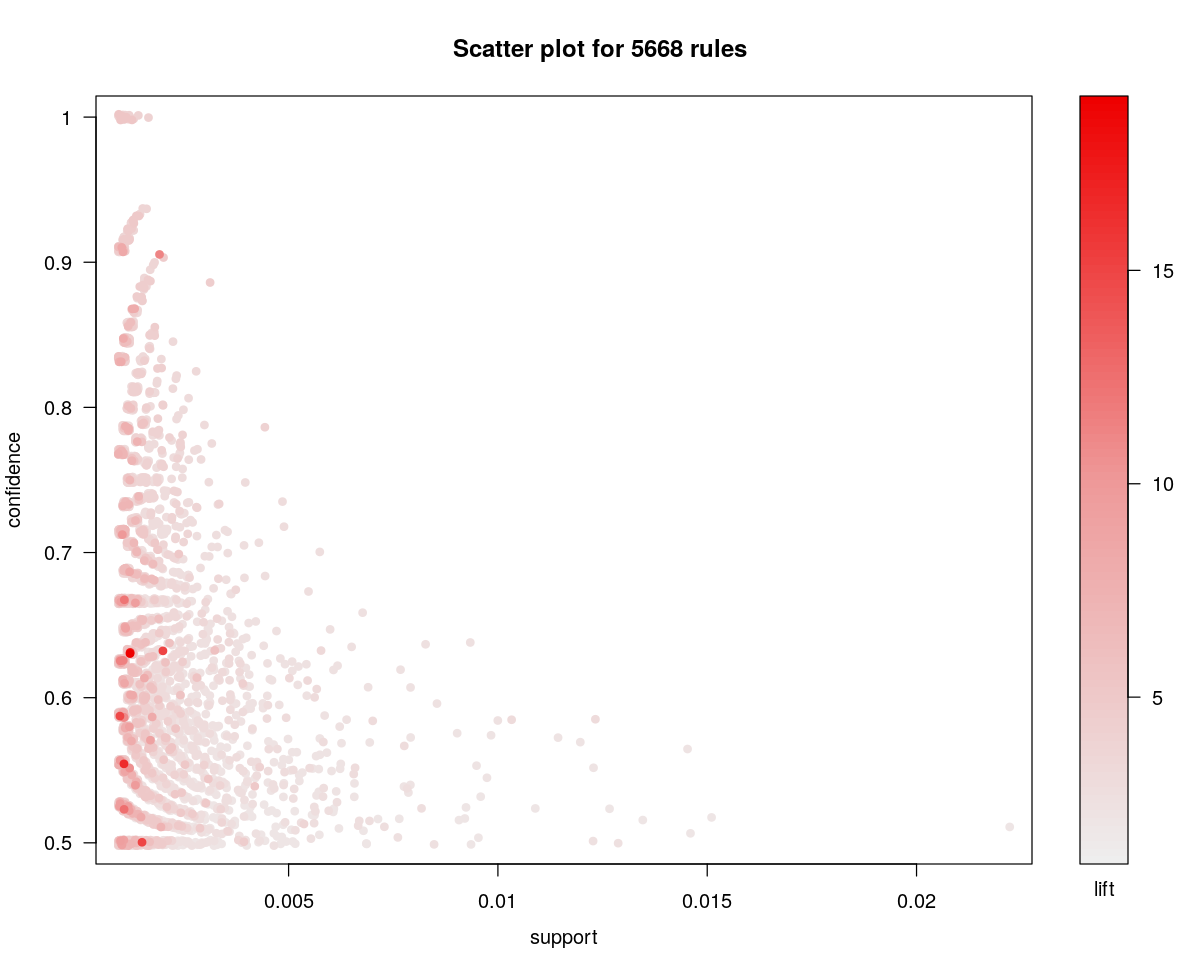

In [13]:
inspect(association.rules[1:10])
options(repr.plot.width = 10, repr.plot.height=8)
plot(association.rules)

## Ejercicios
1. ¿Cuáles reglas parecen interesantes de esta salida?

2. ¿ Cuáles reglas podrían ser 'poco' interesantes?

3. Utilizando la métrica de 'lift', ¿Cuáles serían algunas de las reglas más interesantes?

4. ¿Qué pasa si utilizamos diferentes niveles de soporte y confianza? Se llega a otras reglas más interesantes?

## Conclusiones

- Las tablas de datos transaccionales requieren de un manejo diferente a las tablas tradicionales y requieren de transformación en la mayoría de casos para su análisis

- Conocer los ítems más frecuentes permite sacar conclusiones interesantes sobre las compras

- La aplicación de las reglas de asociación es bastante sencilla